In [1]:
from pathlib import Path
import pandas as pd

# Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes:
    - 'Normal': 0, 
    - 'Supraventricular ectopic beat': 1, 
    - 'Ventricular ectopic beat': 2, 
    - 'Fusion beat': 3, 
    - 'Unknown beat': 4
- All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

How is the train/test split?

In [2]:
datadir = Path('../data/raw')
trainfile = datadir / 'heart_big_train.parq'
validfile = datadir / 'heart_big_valid.parq'

train_df = pd.read_parquet(trainfile)
valid_df = pd.read_parquet(validfile)
len(train_df), len(valid_df)

(87554, 10946)

And what about the balance of the target?

In [3]:
train_df.target.value_counts(), valid_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
valid_percentages = valid_df.target.value_counts(normalize=True) * 100
train_percentages,  valid_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

What does the signal look like?

0      1.000000
1      0.659459
2      0.186486
3      0.070270
4      0.070270
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 2, Length: 187, dtype: float64


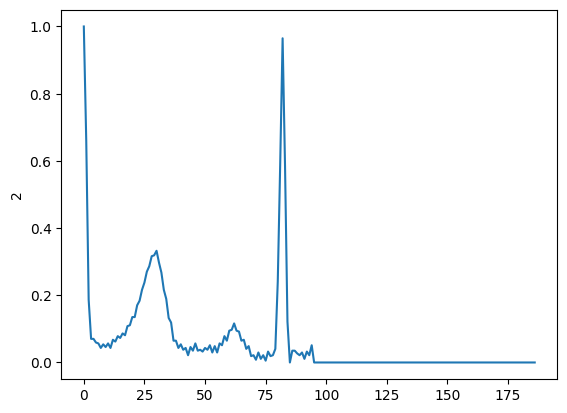

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [5]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186',
       'target'],
      dtype='object', length=188)